# Práctico 5: Raíces de Funciones

En este notebook resolveremos el quinto práctico enfocado en la obtención de raíces de funciones.

El objetivo es obtener la raíz de la función

$$ f(x) = (5x^2 + 3x - 2) \cos\left(\frac{x}{2\pi}\right) e^{x} $$

en el intervalo $x \in (0, 1)$ a través de los siguientes métodos:

- bisección,
- secante,
- Newton-Raphson.

La raíz de la función puede calcularse analíticamente: se halla en $x = 0.4$.

Importamos librerías necesarias

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton

Definimos la función a analizar

In [2]:
def f(x):
    return (5 * x ** 2 + 3 * x - 2) * np.cos(x / 2 / np.pi) * np.exp(x)

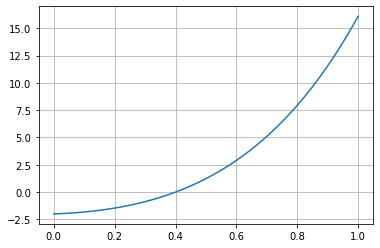

In [3]:
x = np.linspace(0, 1, 51)
plt.plot(x, f(x))
plt.grid()
plt.show()

## Bisección

Aplicamos el método de la bisección a través de la función `scipy.optimize.bisect`.
Pasamos como argumentos los límites del intervalo 0 y 1.

In [4]:
root = bisect(f, 0, 1)

print("Raíz de f(x) con el método de la bisección: {}".format(root))

Raíz de f(x) con el método de la bisección: 0.3999999999996362


## Secante

Aplicamos el método de la secante a través de la función `scipy.optimize.newton`.
El método se puede aplicar utilizando dicha función, pero sin pasarle la derivada como argumento.
Pasamos como punto inicial $x = 0$.

In [5]:
root = newton(f, x0=0)

print("Raíz de f(x) con el método de la secante: {}".format(root))

Raíz de f(x) con el método de la secante: 0.39999999999993224


## Newton-Raphson

Para aplicar el método de Newton-Raphson es necesario obtener la derivada de la función. Podemos obtenerla derivando simbolicamente la función a través de SymPy:

In [6]:
x = sym.symbols("x")
diff = sym.diff((5 * x ** 2 + 3 * x - 2) * sym.cos(x / 2 / sym.pi) * sym.exp(x))
sym.simplify(diff)

((-5*x**2 - 3*x + 2)*sin(x/(2*pi))/2 + pi*(5*x**2 + 13*x + 1)*cos(x/(2*pi)))*exp(x)/pi

Definimos una función que devuelva la derivada de $f(x)$

In [7]:
def fprime(x):
    return (
        (5 * x ** 2 + 13 * x + 1) * np.cos(x / 2 / np.pi)
        - (5 * x ** 2 + 3 * x - 2) * np.sin(x / 2 / np.pi) / 2 / np.pi
        ) * np.exp(x)

Aplicamos el método Newton-Raphson a través de la función `scipy.optimize.newton`, pero ahora sí pasamos la derivada como argumento:

In [8]:
root = newton(f, x0=0, fprime=fprime)

print("Raíz de f(x) con el método Newton-Raphson: {}".format(root))

Raíz de f(x) con el método Newton-Raphson: 0.4000000000000001


## Conclusión

Los tres métodos devuelven correctamente la raíz de la función propuesta.